In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing and understanding data

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np

In [ ]:
## Importing Data
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx") 
# encoding = "cp1252" -- is called latent one encoding, helps in reading the data, even if there are some invalid characters. Remove 'code page' based data set
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Ensure the date column has datetime datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
## to check the customer distribution country-wise, after removing duplicates
country_wise_data = data[['Country', 'CustomerID']].drop_duplicates()
country_wise_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [ ]:
## As UK has got the highest customer base count as per the data. Dropping all other countries and focusing only on UK data
uk_data = data.query("Country == 'United Kingdom'").reset_index(drop=True)
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
uk_data.Country.unique() # data corresponding to only 'United Kingdom'

array(['United Kingdom'], dtype=object)

In [ ]:
## finding missing values in data
uk_data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [ ]:
## As customer is our most important feature here, we need to remove all rows where CustomerID is missing
uk_data = uk_data[pd.notnull(uk_data['CustomerID'])]
uk_data.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
## quantity as less than 0 doesn't make any sense. If any record has quantity as -ve, we need to drop those records
uk_data.Quantity.min()

-80995

In [ ]:
# let us find how many records have quantity as negative
uk_data[uk_data.Quantity < 0].count()

InvoiceNo      7533
StockCode      7533
Description    7533
Quantity       7533
InvoiceDate    7533
UnitPrice      7533
CustomerID     7533
Country        7533
dtype: int64

In [ ]:
# Filtering out negative or 0 values Quantity records
uk_data = uk_data[uk_data.Quantity > 0]
uk_data[uk_data.Quantity < 0].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
## converting Invoice date to datetype
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])
uk_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
## As we don't have revenue column we need to create it
uk_data['TotalAmount'] = uk_data['Quantity'] * uk_data['UnitPrice']
uk_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### RFM Modelling

In [ ]:
# creating customer dataframe
uk_customers = pd.DataFrame(uk_data['CustomerID'].unique())
uk_customers.columns = ['CustomerID']
uk_customers.head()

,CustomerID
0,17850.0
1,13047.0
2,13748.0
3,15100.0
4,15291.0


##### Recency

In [ ]:
## finding the latest date as per extracted data
## adding 1 day to the max date in InvoiceDates throughout the dataset
latest_date = uk_data.InvoiceDate.max() + pd.Timedelta(days=1)
latest_date

Timestamp('2011-12-10 12:49:00')

In [ ]:

# Calculating recency (first of RMF) - measure of how long it’s been since the customer’s last purchase or the number of days since the customer’s last order.
df_recency = uk_data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_recency.columns = ['CustomerID', 'recency_date']
uk_customers = uk_customers.merge(df_recency, on='CustomerID')


uk_customers['Recency'] = round((latest_date - uk_customers['recency_date']) / np.timedelta64(1,'D')).astype(int)
# np.timedelta64(1,'D') --> is considering each day as 1

uk_customers.head()

,CustomerID,recency_date,Recency
0,17850.0,2010-12-02 15:27:00,373
1,13047.0,2011-11-08 12:06:00,32
2,13748.0,2011-09-05 09:45:00,96
3,15100.0,2011-01-10 10:35:00,334
4,15291.0,2011-11-14 11:02:00,26


In [ ]:
# checking the Recency value for a particular customer
uk_customers[uk_customers['CustomerID'] == 12346.0]

,CustomerID,recency_date,Recency
1002,12346.0,2011-01-18 10:01:00,326


##### Frequency

In [ ]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
## Calculating frequency: Frequency is a measure of the number of orders a customer has placed. (unique order ids)
## There are two ways to calculate the frequency: one using unique values and the other being just the count() function which considers repititions

df_frequency = uk_data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index() #uk_data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df_frequency.columns = ['CustomerID', 'Frequency']
uk_customers = uk_customers.merge(df_frequency, on='CustomerID')

uk_customers.head()

,CustomerID,recency_date,Recency,Frequency
0,17850.0,2010-12-02 15:27:00,373,34
1,13047.0,2011-11-08 12:06:00,32,10
2,13748.0,2011-09-05 09:45:00,96,5
3,15100.0,2011-01-10 10:35:00,334,3
4,15291.0,2011-11-14 11:02:00,26,15


##### Monetary

In [ ]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
## Calculating Monetary: is the sum total revenue generated by each customer.
df_monetory = uk_data.groupby('CustomerID')['TotalAmount'].sum().reset_index()
df_monetory.columns = ['CustomerID', 'Monetary']
uk_customers = uk_customers.merge(df_monetory, on='CustomerID')

uk_customers.head()

,CustomerID,recency_date,Recency,Frequency,Monetary
0,17850.0,2010-12-02 15:27:00,373,34,5391.21
1,13047.0,2011-11-08 12:06:00,32,10,3237.54
2,13748.0,2011-09-05 09:45:00,96,5,948.25
3,15100.0,2011-01-10 10:35:00,334,3,876.00
4,15291.0,2011-11-14 11:02:00,26,15,4668.30


##### Tenure

In [ ]:
## finding the latest date as per extracted data
## adding 1 day to the max date in InvoiceDates throughout the dataset
latest_date = uk_data.InvoiceDate.max() + pd.Timedelta(days=1)
latest_date

Timestamp('2011-12-10 12:49:00')

In [ ]:
## Calculating tenure: measures how long a given customer has been with the company
df_tenure = uk_data.groupby('CustomerID')['InvoiceDate'].min().reset_index()
df_tenure.columns = ['CustomerID', 'tenure_date']
uk_customers = uk_customers.merge(df_tenure, on='CustomerID')

uk_customers['Tenure'] = round((latest_date - uk_customers['tenure_date']) / np.timedelta64(1,'D')).astype(int)
uk_customers.head()

,CustomerID,recency_date,Recency,Frequency,Monetary,tenure_date,Tenure
0,17850.0,2010-12-02 15:27:00,373,34,5391.21,2010-12-01 08:26:00,374
1,13047.0,2011-11-08 12:06:00,32,10,3237.54,2010-12-01 08:34:00,374
2,13748.0,2011-09-05 09:45:00,96,5,948.25,2010-12-01 09:00:00,374
3,15100.0,2011-01-10 10:35:00,334,3,876.00,2010-12-01 09:09:00,374
4,15291.0,2011-11-14 11:02:00,26,15,4668.30,2010-12-01 09:32:00,374


##### Variety

In [ ]:
uk_data.head()
# just to have a preview

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# checking if StockCode and Description have 1-to-1 mapping: Based on the count, it doesn't seems so
print(uk_data.StockCode.nunique())
print(uk_data.Description.nunique())

3645
3844


In [ ]:
stock_desc_df = uk_data.groupby(['StockCode'])['Description'].nunique().reset_index()
stock_desc_df = stock_desc_df[stock_desc_df.Description > 1]
StockCode_list_multi_desc = stock_desc_df.StockCode.to_list()
print(StockCode_list_multi_desc)

[20622, 21109, 21112, 21175, 21232, 21243, 21507, 21811, 21818, 21899, 21928, 22129, 22134, 22135, 22179, 22197, 22268, 22285, 22286, 22287, 22383, 22407, 22416, 22466, 22502, 22584, 22595, 22597, 22602, 22632, 22776, 22777, 22778, 22785, 22804, 22812, 22813, 22847, 22849, 22900, 22932, 22937, 22939, 22949, 22950, 22952, 22963, 22965, 22972, 22985, 22986, 22999, 23015, 23020, 23028, 23029, 23031, 23032, 23040, 23041, 23043, 23044, 23045, 23047, 23056, 23057, 23061, 23065, 23066, 23068, 23071, 23075, 23079, 23081, 23086, 23091, 23103, 23104, 23106, 23107, 23109, 23126, 23127, 23128, 23130, 23131, 23145, 23148, 23168, 23169, 23188, 23191, 23194, 23196, 23197, 23203, 23205, 23209, 23212, 23214, 23229, 23231, 23232, 23235, 23236, 23237, 23240, 23244, 23249, 23250, 23251, 23252, 23253, 23254, 23256, 23271, 23280, 23281, 23282, 23283, 23292, 23298, 23299, 23306, 23324, 23325, 23342, 23359, 23360, 23366, 23370, 23380, 23389, 23390, 23396, 23402, 23413, 23436, 23437, 23438, 23454, 23455, 23456

In [ ]:
## sorting the dataframe using StockCode column which is of type object
stock_desc = uk_data[uk_data['StockCode'].isin(StockCode_list_multi_desc)].sort_values(['StockCode'], key=lambda x:x.str.split())
stock_desc.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
302718,566049,16156L,WRAP CAROUSEL,25,2011-09-08 14:28:00,0.42,15730.0,United Kingdom,10.50
203007,556199,16156L,WRAP CAROUSEL,25,2011-06-09 12:40:00,0.42,16170.0,United Kingdom,10.50
95376,545054,16156L,"WRAP, CAROUSEL",25,2011-02-27 12:41:00,0.42,14472.0,United Kingdom,10.50
231594,559063,16156L,WRAP CAROUSEL,50,2011-07-06 10:10:00,0.42,17220.0,United Kingdom,21.00
158454,551426,16156L,WRAP CAROUSEL,25,2011-04-28 14:39:00,0.42,14022.0,United Kingdom,10.50
449811,578211,16156L,WRAP CAROUSEL,25,2011-11-23 11:47:00,0.42,12748.0,United Kingdom,10.50
232434,559155,16156L,WRAP CAROUSEL,25,2011-07-06 15:49:00,0.42,13418.0,United Kingdom,10.50
178195,553509,16156L,WRAP CAROUSEL,25,2011-05-17 13:44:00,0.42,17220.0,United Kingdom,10.50
99940,545530,16156L,"WRAP, CAROUSEL",25,2011-03-03 13:45:00,0.42,17416.0,United Kingdom,10.50
127059,548189,16156L,WRAP CAROUSEL,25,2011-03-29 15:15:00,0.42,16607.0,United Kingdom,10.50


In [ ]:
## Observations:
    ## Each StockCode can have multiple Descriptions, but the Descriptions sometimes appears to be same, just a comma here and there
    ## Still we will use Description column to calculate variety

In [ ]:
## calculating variety: indicates a measure of the number of unique SKUs purchased.
df_variety = uk_data.groupby('CustomerID')['Description'].nunique().reset_index()
df_variety.columns = ['CustomerID', 'Variety']
uk_customers = uk_customers.merge(df_variety, on='CustomerID')
uk_customers.head()

,CustomerID,recency_date,Recency,Frequency,Monetary,tenure_date,Tenure,Variety
0,17850.0,2010-12-02 15:27:00,373,34,5391.21,2010-12-01 08:26:00,374,21
1,13047.0,2011-11-08 12:06:00,32,10,3237.54,2010-12-01 08:34:00,374,106
2,13748.0,2011-09-05 09:45:00,96,5,948.25,2010-12-01 09:00:00,374,24
3,15100.0,2011-01-10 10:35:00,334,3,876.00,2010-12-01 09:09:00,374,1
4,15291.0,2011-11-14 11:02:00,26,15,4668.30,2010-12-01 09:32:00,374,62


##### Average Order Value

In [ ]:
## Calculating AOV: Average order value, calculated by dividing the total spend by each customer to total number of orders
uk_customers['avg_order_value'] = round(uk_customers['Monetary'] / uk_customers['Frequency'], 2)
uk_customers.head()

,CustomerID,recency_date,Recency,Frequency,Monetary,tenure_date,Tenure,Variety,avg_order_value
0,17850.0,2010-12-02 15:27:00,373,34,5391.21,2010-12-01 08:26:00,374,21,158.56
1,13047.0,2011-11-08 12:06:00,32,10,3237.54,2010-12-01 08:34:00,374,106,323.75
2,13748.0,2011-09-05 09:45:00,96,5,948.25,2010-12-01 09:00:00,374,24,189.65
3,15100.0,2011-01-10 10:35:00,334,3,876.00,2010-12-01 09:09:00,374,1,292.00
4,15291.0,2011-11-14 11:02:00,26,15,4668.30,2010-12-01 09:32:00,374,62,311.22


#### Understanding Each of the calculated Matrices

In [ ]:
## Description Statistics on Recency
uk_customers.Recency.describe()

## Observations: min value for recency is 1, and 75% of customer's Recency value is less than 143.

count    3921.000000
mean       92.722265
std        99.528532
min         1.000000
25%        18.000000
50%        51.000000
75%       143.000000
max       374.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


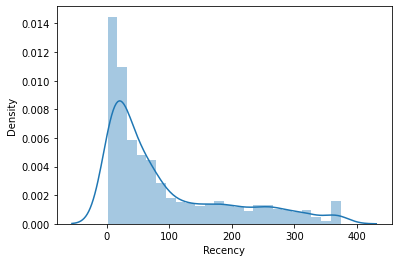

In [ ]:
import seaborn as sns
x = uk_customers['Recency']
ax = sns.distplot(x)

## the distribution over recency is right skewed symbolizing that most of the Recency values are between 0 - 100

In [ ]:
## Descriptive Statistics on Frequency
uk_customers.Frequency.describe()

## Observations: min frequency is 1 and surprisingly 25% of customers has only done 2 purchages (i.e., frequency 1)
                ## 75% of customers have done 6 or lesser purchages

count    3921.000000
mean        4.246111
std         7.205750
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


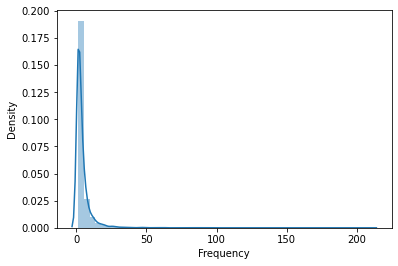

In [ ]:
import seaborn as sns
x = uk_customers.query('Frequency < 1000')['Frequency']
ax = sns.distplot(x)

## Observations: highly skewed data between 0 - 5, which clearly shows that most of the customers are very infrequent

In [ ]:
## Descriptive Statistics on Monetary
uk_customers.Monetary.describe()

## Observations: clearly 75% of customers are spending less or equal to 1575 dollars, 

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

In [ ]:
## Checking how many customer are paying high amounts, i.e., more than 200000
uk_customers.query('Monetary > 200000')['CustomerID']

## so the max value we are seeing is clearly an outlier by one customer who spent huge amount

392    18102.0
Name: CustomerID, dtype: float64

In [ ]:
uk_customers[uk_customers.CustomerID == 18102.0]
# this customer seems very high valued customer as it has the least recency i.e., bought something very recently
# is a very frequent customer and total monetary value is super high

,CustomerID,recency_date,Recency,Frequency,Monetary,tenure_date,Tenure,Variety,avg_order_value
392,18102.0,2011-12-09 11:50:00,1,60,259657.3,2010-12-07 16:42:00,368,162,4327.62


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


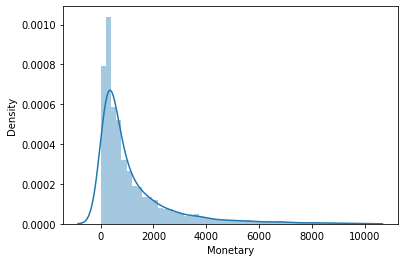

In [ ]:
import seaborn as sns
x = uk_customers.query('Monetary < 10000')['Monetary']
ax = sns.distplot(x)

## Observations: here the distribution tells the same story, wherein we can see right skewed distribution, most values being within 0 to 2500

#### Segmentation based on RFM values

In [ ]:
RFMScores = uk_customers[['CustomerID', 'Recency', 'Frequency', 'Monetary']].copy()
RFMScores.head()

,CustomerID,Recency,Frequency,Monetary
0,17850.0,373,34,5391.21
1,13047.0,32,10,3237.54
2,13748.0,96,5,948.25
3,15100.0,334,3,876.00
4,15291.0,26,15,4668.30


In [ ]:
## Splitting the data into four segments using quantiles i.e., [0-0.25, 0.25-0.5, 0.5-0.75, 0.75-1.0]

quantiles = RFMScores.quantile(q=[0.25, 0.5,0.75]) 
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14208.0,18.0,1.0,300.04
0.50,15569.0,51.0,2.0,651.82
0.75,16913.0,143.0,5.0,1575.89


In [ ]:
## converting the quantile dataframe to quantile dict
quantile_dict = quantiles.to_dict()
quantile_dict

{'CustomerID': {0.25: 14208.0, 0.5: 15569.0, 0.75: 16913.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.04, 0.5: 651.8199999999999, 0.75: 1575.89},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0}}

In [ ]:
quantile_dict.pop('CustomerID')
quantile_dict

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.04, 0.5: 651.8199999999999, 0.75: 1575.89},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0}}

In [ ]:
## Function to create R, F and M segments
## Here in case of Recency, the lesser the value, the better the customer
## But for monetary and segments, the greater the value, the better the customer

def RScoring(rfm_val, rfm_category, quartile_dict):
  if rfm_val <= quartile_dict[rfm_category][0.25]:
    return 1
  elif rfm_val <= quartile_dict[rfm_category][0.50]:
    return 2
  elif rfm_val <= quartile_dict[rfm_category][0.75]:
    return 3
  else: 
    return 4


def FMScoring(rfm_val, rfm_category, quartile_dict):
  if rfm_val <= quartile_dict[rfm_category][0.25]:
    return 4
  elif rfm_val <= quartile_dict[rfm_category][0.50]:
    return 3
  elif rfm_val <= quartile_dict[rfm_category][0.75]:
    return 2
  else:
    return 1


In [ ]:
## Calculating the segments based on Recency, Frequency and Monetary values with the help of methods defined above
RFMScores.loc[:,'R_Score'] = RFMScores.loc[:,'Recency'].apply(RScoring, args=('Recency', quantile_dict))
RFMScores.loc[:,'F_Score'] = RFMScores.loc[:,'Frequency'].apply(FMScoring, args=('Frequency', quantile_dict))
RFMScores.loc[:,'M_Score'] = RFMScores.loc[:,'Monetary'].apply(FMScoring, args=('Monetary', quantile_dict))
RFMScores.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,17850.0,373,34,5391.21,4,1,1
1,13047.0,32,10,3237.54,2,1,1
2,13748.0,96,5,948.25,3,2,2
3,15100.0,334,3,876.00,4,2,2
4,15291.0,26,15,4668.30,2,1,1


In [ ]:
## Calculating RFMScore{numeric sum of those values} and RFMGroup{string concatenation of values} using the R_Score, F_Score and M_Score obtained

RFMScores['RFMGroup'] = RFMScores.R_Score.map(str) + RFMScores.F_Score.map(str) + RFMScores.M_Score.map(str)

RFMScores['RFMScore'] = RFMScores[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
RFMScores.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMGroup,RFMScore
0,17850.0,373,34,5391.21,4,1,1,411,6
1,13047.0,32,10,3237.54,2,1,1,211,4
2,13748.0,96,5,948.25,3,2,2,322,7
3,15100.0,334,3,876.00,4,2,2,422,8
4,15291.0,26,15,4668.30,2,1,1,211,4


In [ ]:
## setting CustomerID column index 
RFMScores.set_index('CustomerID', inplace=True)
RFMScores.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMGroup,RFMScore
CustomerID,,,,,,,,
17850.0,373,34,5391.21,4,1,1,411,6
13047.0,32,10,3237.54,2,1,1,211,4
13748.0,96,5,948.25,3,2,2,322,7
15100.0,334,3,876.00,4,2,2,422,8
15291.0,26,15,4668.30,2,1,1,211,4


In [ ]:
RFMScores.RFMScore.unique()
# unique values of RFMScore using which we gonna cluster the data

array([ 6,  4,  7,  8,  3,  5, 11, 10, 12,  9])

In [ ]:
RFMScores.groupby(['RFMScore']).count()
## to see how many customers are coming per RFMScores

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMGroup
RFMScore,,,,,,,
3,423,423,423,423,423,423,423
4,300,300,300,300,300,300,300
5,348,348,348,348,348,348,348
6,408,408,408,408,408,408,408
7,367,367,367,367,367,367,367
8,374,374,374,374,374,374,374
9,407,407,407,407,407,407,407
10,443,443,443,443,443,443,443
11,455,455,455,455,455,455,455


In [ ]:
## Assigning Loyalty level based on RFMScores
loyalty_levels = ['Platinum', 'Gold', 'Silver', 'Bronze']

## qcut the bins will be chosen so that we have the same number of records in each bin.
loyalty_cuts = pd.qcut(RFMScores.RFMScore, q=4, labels = loyalty_levels)
loyalty_cuts

CustomerID
17850.0        Gold
13047.0    Platinum
13748.0        Gold
15100.0        Gold
15291.0    Platinum
             ...   
15471.0        Gold
13436.0      Silver
15520.0        Gold
13298.0        Gold
14569.0      Silver
Name: RFMScore, Length: 3921, dtype: category
Categories (4, object): ['Platinum' < 'Gold' < 'Silver' < 'Bronze']

In [ ]:
RFMScores['RFM_Level_qcut'] = loyalty_cuts.values
RFMScores.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMGroup,RFMScore,RFM_Level_qcut
CustomerID,,,,,,,,,
17850.0,373,34,5391.21,4,1,1,411,6,Gold
13047.0,32,10,3237.54,2,1,1,211,4,Platinum
13748.0,96,5,948.25,3,2,2,322,7,Gold
15100.0,334,3,876.00,4,2,2,422,8,Gold
15291.0,26,15,4668.30,2,1,1,211,4,Platinum


In [ ]:
RFMScores.groupby(['RFM_Level_qcut']).count()
## to see how many customers are coming per RFM_Level

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMGroup,RFMScore
RFM_Level_qcut,,,,,,,,
Platinum,1071,1071,1071,1071,1071,1071,1071,1071
Gold,1149,1149,1149,1149,1149,1149,1149,1149
Silver,850,850,850,850,850,850,850,850
Bronze,851,851,851,851,851,851,851,851


#### Plotting of RFM segmentation

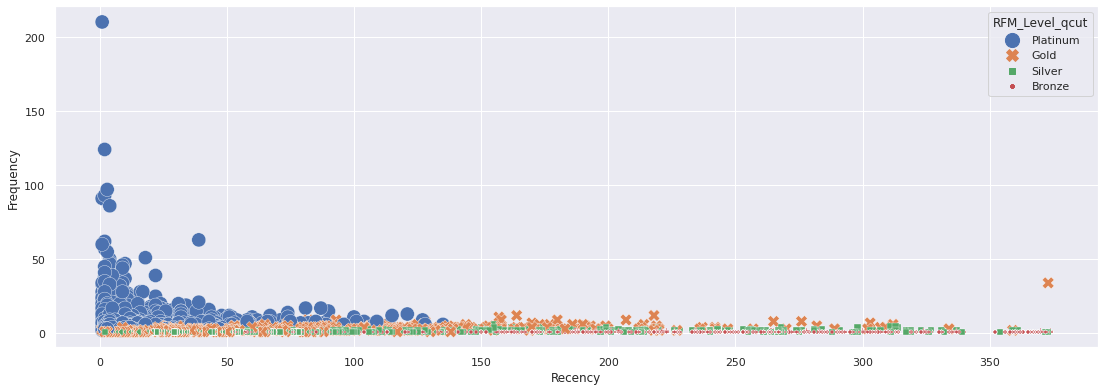

In [ ]:
## Recency VS Frequency
import seaborn as sns
sns.set(rc={'figure.figsize':(18.7,6.27)})
sns.scatterplot(data=RFMScores, x="Recency", y="Frequency", hue="RFM_Level_qcut", style="RFM_Level_qcut", size="RFM_Level_qcut", sizes=(20, 200))

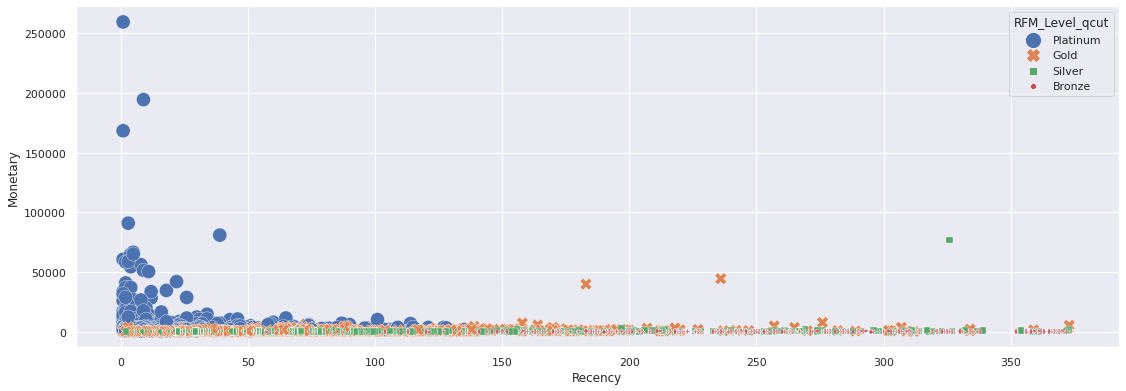

In [ ]:
## Recency VS Monetary
import seaborn as sns
sns.set(rc={'figure.figsize':(18.7,6.27)})
sns.scatterplot(data=RFMScores, x="Recency", y="Monetary", hue="RFM_Level_qcut", style="RFM_Level_qcut", size="RFM_Level_qcut", sizes=(20, 200))

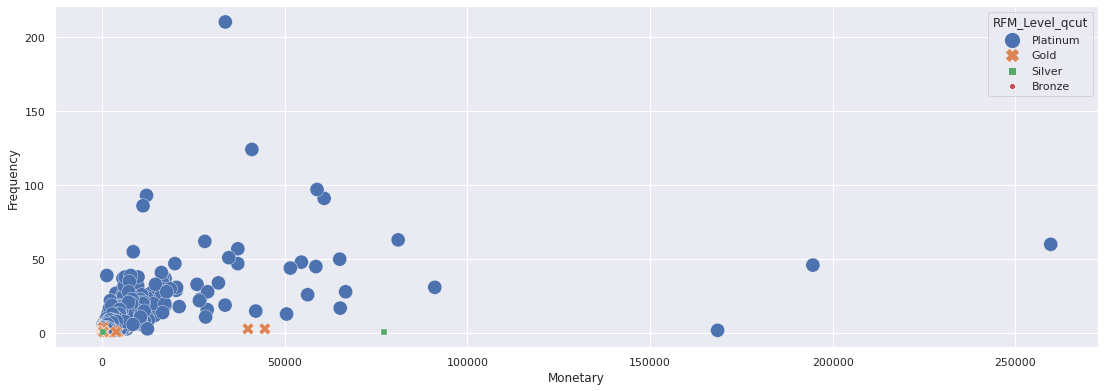

In [ ]:
## Monetary VS Frequency
import seaborn as sns
sns.set(rc={'figure.figsize':(18.7,6.27)})
sns.scatterplot(data=RFMScores, x="Monetary", y="Frequency", hue="RFM_Level_qcut", style="RFM_Level_qcut", size="RFM_Level_qcut", sizes=(20, 200))

#### K-means Clustering

In [ ]:
## before starting with k-means clustering, we have to handle negative values as we will use log tranformation on features. 
## k-means is a distance based algorithm, and thus features need to be scaled

def handle_neg_zero(number):
  if number <= 0:
    return 1
  else:
    return number


## Since we have 0 values in monetary feature, we will handle them
RFMScores['Monetary'] = [handle_neg_zero(x) for x in RFMScores.Monetary]
RFMScores.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMGroup,RFMScore,RFM_Level_qcut
CustomerID,,,,,,,,,
17850.0,373,34,5391.21,4,1,1,411,6,Gold
13047.0,32,10,3237.54,2,1,1,211,4,Platinum
13748.0,96,5,948.25,3,2,2,322,7,Gold
15100.0,334,3,876.00,4,2,2,422,8,Gold
15291.0,26,15,4668.30,2,1,1,211,4,Platinum


In [ ]:
## Performing log transformation to bring data into normal or near normal distribution

RFMScores_LogTransformed = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

RFMScores_LogTransformed.head()

,Recency,Frequency,Monetary
CustomerID,,,
17850.0,5.922,3.526,8.593
13047.0,3.466,2.303,8.083
13748.0,4.564,1.609,6.855
15100.0,5.811,1.099,6.775
15291.0,3.258,2.708,8.449


In [ ]:
RFMScores_LogTransformed.describe()
# Describe method to find max and min values after log transformation

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,3.798448,0.945288,6.541543
std,1.382285,0.900419,1.251338
min,0.000000,0.000000,0.000000
25%,2.890000,0.000000,5.704000
50%,3.932000,0.693000,6.480000
75%,4.963000,1.609000,7.363000
max,5.924000,5.347000,12.467000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


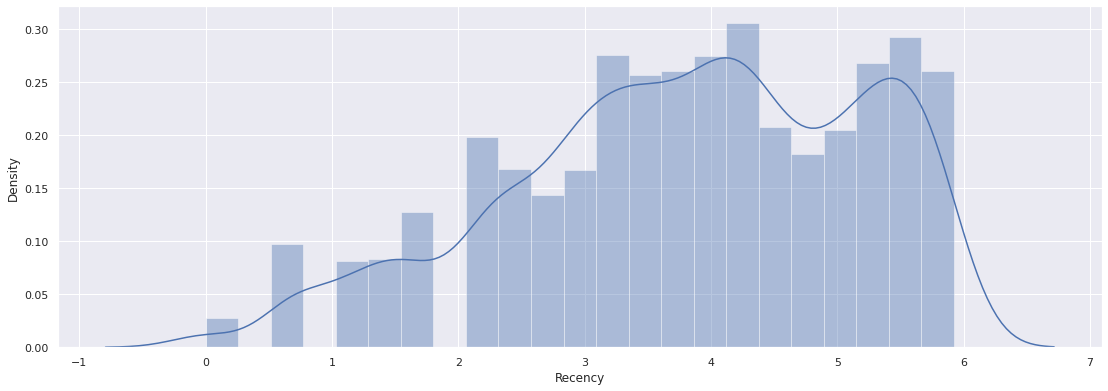

In [ ]:
## Data distribution after log transformation of Recency
recency_logPlot = RFMScores_LogTransformed['Recency']
ax = sns.distplot(recency_logPlot)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


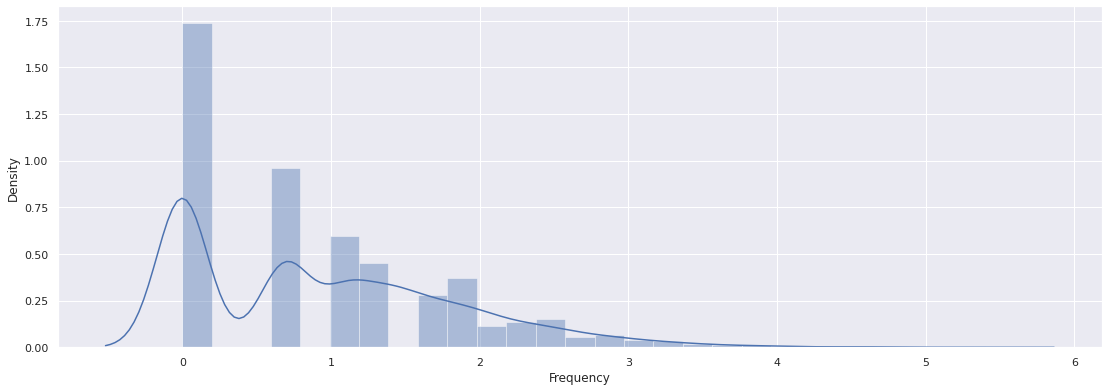

In [ ]:

## Data distribution after log transformation of Frequency
frequency_logPlot = RFMScores_LogTransformed.query('Frequency < 1000')['Frequency']
ax = sns.distplot(frequency_logPlot)

# still right skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


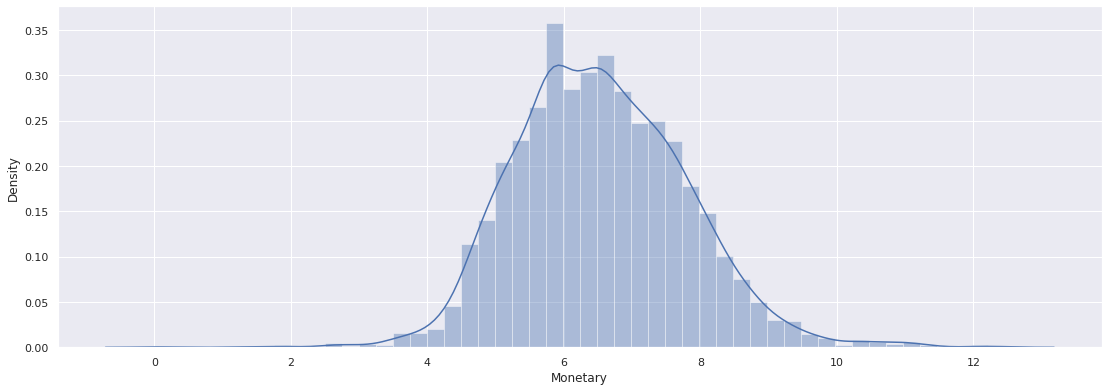

In [ ]:

## Data distribution after log transformation of Monetary
monetary_logPlot = RFMScores_LogTransformed.query('Monetary < 10000')['Monetary']
ax = sns.distplot(monetary_logPlot)

## almost perfect normal distribution

In [ ]:
## we need to bring all the features to same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
RFMScores_LogTransformed_Scaled = scaler.fit_transform(RFMScores_LogTransformed)

RFMScores_LogTransformed_Scaled ## this got converted to numpy array

array([[ 1.53645849,  2.86648848,  1.63961989],
       [-0.24053674,  1.5080587 ,  1.23200416],
       [ 0.55390168,  0.73720812,  0.25052944],
       ...,
       [-2.24689169, -1.04996563, -0.56150503],
       [-2.24689169, -1.04996563, -0.52394044],
       [-2.24689169, -1.04996563, -0.89079459]])

In [ ]:

## converting the scaled numpy array to dataframe
RFMScores_LogTransformed_Scaled = pd.DataFrame(RFMScores_LogTransformed_Scaled, index = RFMScores_LogTransformed.index, columns = RFMScores_LogTransformed.columns)
RFMScores_LogTransformed_Scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
17850.0,1.536458,2.866488,1.639620
13047.0,-0.240537,1.508059,1.232004
13748.0,0.553902,0.737208,0.250529
15100.0,1.456146,0.170733,0.186590
15291.0,-0.391031,1.957907,1.524528


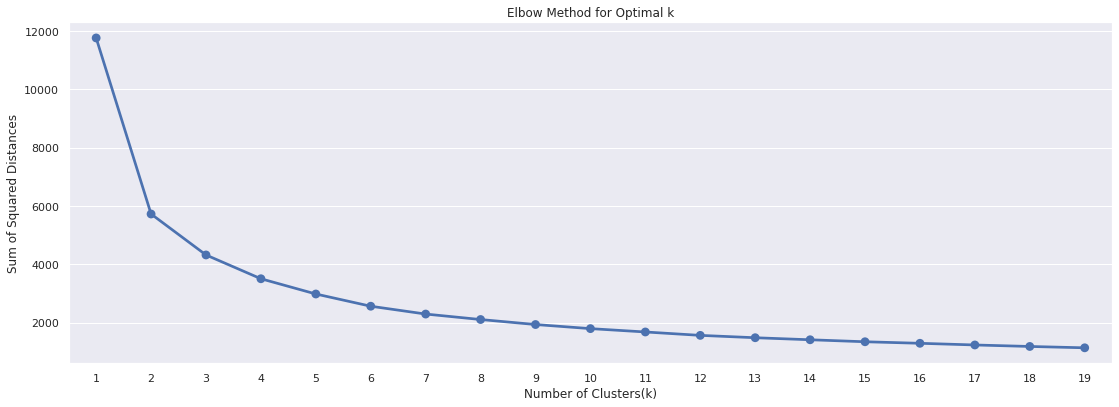

In [ ]:
## Finding the best number of clusters using WCSS,k-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = {} # for each k, its corresponding wcss
for k in range(1,20):
  km = KMeans(n_clusters = k, init='k-means++', max_iter=1000)
    # ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
    # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

  km = km.fit(RFMScores_LogTransformed_Scaled)
  wcss[k] = km.inertia_



## plotting the graph for the sum of square distance values and number of clusters
sns.pointplot(x=list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
# selecting 5 clusters based on above wcss graph
KMean_clust = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(RFMScores_LogTransformed_Scaled)

#Find the clusters for the observation given in the dataset
RFMScores['KMeans_Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMGroup,RFMScore,RFM_Level_qcut,KMeans_Cluster
CustomerID,,,,,,,,,,
17850.0,373,34,5391.21,4,1,1,411,6,Gold,2
13047.0,32,10,3237.54,2,1,1,211,4,Platinum,2
13748.0,96,5,948.25,3,2,2,322,7,Gold,1
15100.0,334,3,876.00,4,2,2,422,8,Gold,1
15291.0,26,15,4668.30,2,1,1,211,4,Platinum,2


In [ ]:
##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", "black", "yellow"]
cluster_codes = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5']
RFMScores['KMeans_Cluster_Code'] = RFMScores['KMeans_Cluster'].map(lambda p: cluster_codes[p]) # mapping cluster to cluster codes
RFMScores.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMGroup,RFMScore,RFM_Level_qcut,KMeans_Cluster,KMeans_Cluster_Code
CustomerID,,,,,,,,,,,
17850.0,373,34,5391.21,4,1,1,411,6,Gold,2,Cluster3
13047.0,32,10,3237.54,2,1,1,211,4,Platinum,2,Cluster3
13748.0,96,5,948.25,3,2,2,322,7,Gold,1,Cluster2
15100.0,334,3,876.00,4,2,2,422,8,Gold,1,Cluster2
15291.0,26,15,4668.30,2,1,1,211,4,Platinum,2,Cluster3


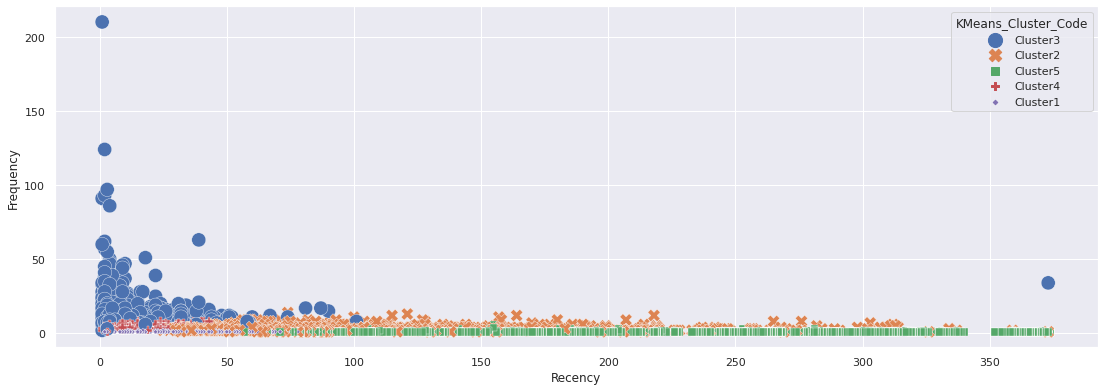

In [ ]:
## Recency VS Frequency
import seaborn as sns
sns.set(rc={'figure.figsize':(18.7,6.27)})
sns.scatterplot(data=RFMScores, x="Recency", y="Frequency", hue="KMeans_Cluster_Code", style="KMeans_Cluster_Code", size="KMeans_Cluster_Code", sizes=(20, 200))

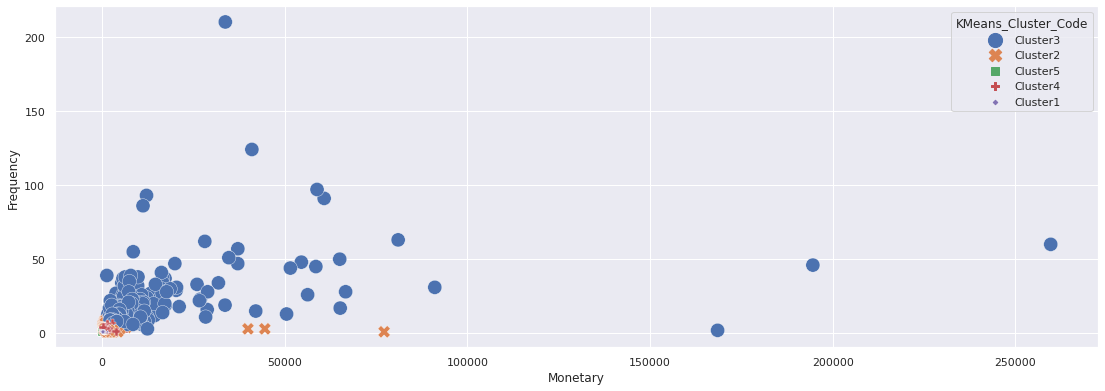

In [ ]:
## Monetary VS Frequency
import seaborn as sns
sns.set(rc={'figure.figsize':(18.7,6.27)})
sns.scatterplot(data=RFMScores, x="Monetary", y="Frequency", hue="KMeans_Cluster_Code", style="KMeans_Cluster_Code", size="KMeans_Cluster_Code", sizes=(20, 200))

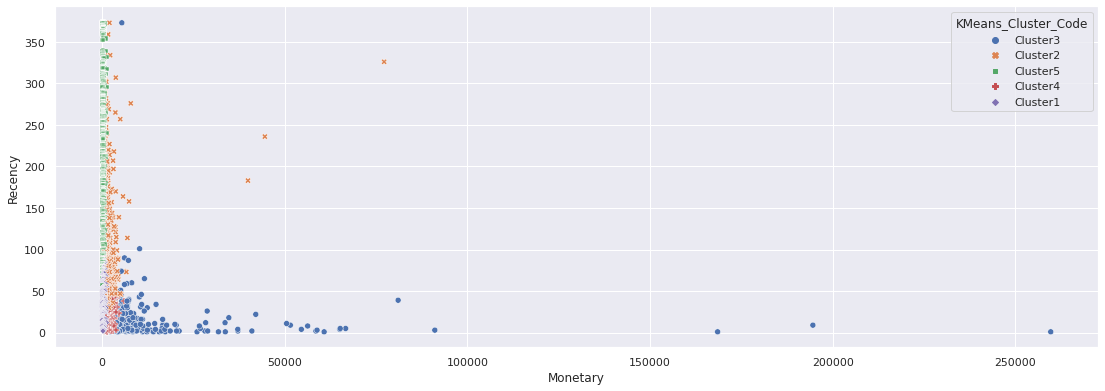

In [ ]:
## Monetary VS Recency
import seaborn as sns
sns.set(rc={'figure.figsize':(18.7,6.27)})
sns.scatterplot(data=RFMScores, x="Monetary", y="Recency", hue="KMeans_Cluster_Code", style="KMeans_Cluster_Code", sizes=(20, 200))

In [ ]:
## References:
  ## https://practicaldatascience.co.uk/data-science/how-to-segment-customers-based-on-their-value-using-rfm-and-abc
  ## https://practicaldatascience.co.uk/data-science/how-to-calculate-clv-using-bgnbd-and-gamma-gamma
  ## https://github.com/nitinkaushik01/Deep_and_Machine_Learning_Projects/blob/master/Customer_Segmentation_using_RFM_and_KMeans_Models/Customer_Segmentation_to_identify_Loyal_Customers.ipynb